# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create two new dataframes

north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [2]:
# Put your EDA code here

north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [3]:
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [4]:
### EDA Q1 How many reps are in each branch?

#Number of reps: North
north_df['Rep ID'].drop_duplicates().count()

9

In [5]:
# Number of reps: South
south_df['Rep ID'].drop_duplicates().count()

11

In [6]:
### EDA Q2 What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

# Avg. minutes and times per category: North
north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().to_frame(name="N: Avg.")

,N: Avg.
Busy Minutes,9.987755
Not Ready Minutes,1.914286
Incoming Wait Time,3.048780
During Call Wait Time,2.967347


In [7]:
# Avg. minutes and times per category: South
south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().to_frame(name="S: Avg.")

,S: Avg.
Busy Minutes,10.054140
Not Ready Minutes,1.910828
Incoming Wait Time,3.000000
During Call Wait Time,3.076433


In [8]:
### EDA Q3 What is the number of calls taken for each time block?

# Number of calls takes for each time block: North
north_df['Time Block'].value_counts().to_frame(name="N: Time Block")

,N: Time Block
12:00 PM,45
10:00 AM,43
2:00 PM,35
3:00 PM,30
4:00 PM,28
11:00 AM,25
1:00 PM,17
5:00 PM,17
9:00 AM,5


In [9]:
# Number of calls takes for each time block: South
south_df['Time Block'].value_counts().to_frame(name="S: Time Block")

,S: Time Block
12:00 PM,75
10:00 AM,56
3:00 PM,43
11:00 AM,31
2:00 PM,30
5:00 PM,26
4:00 PM,25
1:00 PM,23
9:00 AM,5


### EDA Results

Make note of your results here!

1. How many reps are in each branch? <br>
- North: 9 <br>
- South: 11 <br><br>
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?<br>
- North - See the line Out[6] <br>
- South - See the line Out[7]<br><br>

3. What is the number of calls taken for each time block?<br>
- North - See the line Out[8] <br>
- South - See the line Out[9]

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [10]:
# Clean your data here

### Cleaning Data Q1 
### Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

# North

north_df.loc[north_df['Incoming Wait Time'].isnull(), 'Incoming or Outgoing'].count()

163

In [11]:
north_df['Incoming or Outgoing'].value_counts()

Outgoing    163
Incoming     82
Name: Incoming or Outgoing, dtype: int64

In [12]:
# South

south_df.loc[south_df['Incoming Wait Time'].isnull(), 'Incoming or Outgoing'].count()

188

In [13]:
south_df['Incoming or Outgoing'].value_counts()

Outgoing    188
Incoming    126
Name: Incoming or Outgoing, dtype: int64

In [14]:
### Cleaning Data Q2
### In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

# North
# Group by "Sale"
north_df.groupby('Sale').count()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Sale,,,,,,,,,,,,,,
NO,234,234,234,234,234,234,234,234,234,234,234,77,234,234
YES,10,10,10,10,10,10,10,10,10,10,10,4,10,10
YES,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [15]:
# Add a column to measure the length of Sale. They are supposed to be... NO = 2, YES = 3

north_df['Sale length'] = north_df['Sale'].str.len()
north_df.groupby(['Sale length']).count()

# Found length of 4.

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Sale length,,,,,,,,,,,,,,,
2,234,234,234,234,234,234,234,234,234,234,234,234,77,234,234
3,10,10,10,10,10,10,10,10,10,10,10,10,4,10,10
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [16]:
# Remove whitespace

north_df['Sale'] =north_df['Sale'].str.strip()
north_df.groupby('Sale').count()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Sale length
Sale,,,,,,,,,,,,,,,
NO,234,234,234,234,234,234,234,234,234,234,234,77,234,234,234
YES,11,11,11,11,11,11,11,11,11,11,11,5,11,11,11


In [17]:
### Cleaning Data Q3
### Are there duplicates in the two data sets? If there are, how did you handle them?

# North: find duplicated rows

n_cut_1st_col = north_df.iloc[:, 1:]
n_duplicate_row = n_cut_1st_col[n_cut_1st_col.duplicated()]
n_duplicate_row

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Sale length
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1,2
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1,2


In [18]:
# North: drop duplicates

n_cut_1st_col.drop_duplicates().shape[0]

## Total number of rows were 245 (ref. Out[2]). Dropped duplicates (245-2), now total rows are 243. 

243

In [19]:
# South: find duplicated rows

s_cut_1st_col = south_df.iloc[:, 1:]
s_duplicate_row = s_cut_1st_col[s_cut_1st_col.duplicated()]
s_duplicate_row

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [20]:
# South: drop duplicates

s_cut_1st_col.drop_duplicates().shape[0]

## Total number of rows were 314 (ref. Out[3]). Dropped duplicates (314-3), now total rows are 311.

311

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?<br>
- Yes, all null places correspond to outgoing calls<br><br>
North: <br>
Out[10] - I selected only null values from the 'Incoming Wait Time' column, then assigned the 'Incoming or Outgoing' column right next. As a result, 163 rows are selected as null, and they all seem to appear Outgoing.<br>
Out[11] - I counted the number of 'Outgoing' values to make sure all of them correspond to nulls. Value count of 'Outgoing' is 163. <br><br>
South: <br>
Same mathod using Out[12], Out[13] <br><br>

2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue? <br>
- Step (1) Out[14]<br>
Looking at Sales using Groupby, it's supposed to be grouped in two - NO, YES - but there is one more YES group found. <br>
- Step (2) Out[15]<br>
Created the Sale Length column, and measured the length of values: NO = 2, YES = 3. Found that there's a length of 4, which tells it has whitespace in the string.<br>
- Step (3) Out[16]<br>
Removed the whitespace using strip. <br><br>

3. Are there duplicates in the two data sets? If there are, how did you handle them?<br>
- Yes, there are duplicates in both branches. <br>
I removed the first column, index, in order to find duplicates. Index had unique values each row so it was blocking to find duplicates. After found duplicates, I dropped them out of the dataframe. <br>
North: Out[17] - [18] <br>
South: Out[19] - [20] <br><br>

4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it? <br>
- The first column was unnecessary, the reason and how I handled it are described above at the quenstion no. 3.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [21]:
# Manipulate data here

# Combine the two datasets
df = pd.concat( [n_cut_1st_col, s_cut_1st_col], ignore_index=True)

# Drop last column because I added an extra column at last in North dataset
df = df.iloc[:, :-1]

# Now I can remove duplicates. I will override the dataframe with dropped duplicates dataset.
df = df.drop_duplicates()
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [22]:
### Data Manipulation Q1
# Group by Rep ID, Sum, and Sort by calls. Determine which rep in each branch has the highest number of calls.

df.groupby(["Branch", "Rep ID"])["Calls"].sum().nlargest(2).to_frame("Highest No. of Calls")


,,Highest No. of Calls
Branch,Rep ID,
North,Brent,37
South,Eric,35


In [23]:
### Data Manipulation Q2
# What is the avg. call abandonment rate for each branch and the whole company? 

### Call Avandon Rate (CAR) is calculated within Incoming calls only.

# Step (1) Create a dataframe 
call_dict = df[df['Incoming or Outgoing']=='Incoming'].groupby(["Branch", "Incoming or Outgoing"]).sum()
call_dict

,,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Branch,Incoming or Outgoing,,,,,,,
North,Incoming,1,3,800,158,246.0,244,81
South,Incoming,1,1,1251,245,375.0,390,125


In [24]:
# Step (2) Get Call Abandon Rate - Each branch
call_abandon_rate = (call_dict["Abandoned"] / call_dict["Calls"])*100
call_abandon_rate.to_frame("Call Abandon Rate (%)").round(2)

,,Call Abandon Rate (%)
Branch,Incoming or Outgoing,
North,Incoming,3.7
South,Incoming,0.8


In [25]:
# Step (3) Get Call Abandon Rate - Whole company
# I will repeat the above code but remove "Branch" out of Groupby condition. 

call_dict1 = df[df['Incoming or Outgoing']=='Incoming'].groupby(["Incoming or Outgoing"]).sum()
call_dict1

call_abandon_rate1 = (call_dict1["Abandoned"] / call_dict1["Calls"])*100
call_abandon_rate1.to_frame("Call Abandon Rate (%)").round(2)


,Call Abandon Rate (%)
Incoming or Outgoing,
Incoming,1.94


In [26]:
### Data Manipulation Q3
# Service Level

# What is the percentage of calls asnwered within 2 seconds? 

# Step (1) Sum of calls answered within 2 seconds
speed_answer = pd.pivot_table(df[df['Incoming Wait Time']<=2], values='Calls', index=['Branch'], aggfunc=np.sum, margins=True)
speed_answer

,Calls
Branch,
North,33
South,48
All,81


In [27]:
# Step (2) Count of total incoming calls
count_calls = pd.pivot_table(df[df['Incoming or Outgoing']=='Incoming'], values='Calls', index=['Branch'], aggfunc=np.sum, margins=True)
count_calls 

,Calls
Branch,
North,81
South,125
All,206


In [28]:
# Step (3) Merge the above two
service = pd.merge(speed_answer, count_calls, on="Branch")
service.columns = ['Answered within 2 secs', 'Total Incoming Calls']
service.columns = ['Answered within 2 secs', 'Total Incoming Calls']

In [29]:
# Service level (%)
service["Service Level (%)"] = service["Answered within 2 secs"] / service["Total Incoming Calls"] * 100
service

,Answered within 2 secs,Total Incoming Calls,Service Level (%)
Branch,,,
North,33,81,40.740741
South,48,125,38.400000
All,81,206,39.320388


In [30]:
### Data Manipulation Q4
# Avg. speend of answer? 

avg_speed_answer = pd.pivot_table(df, values='Incoming Wait Time', index=['Branch'], aggfunc=np.mean, margins=True)
avg_speed_answer.round(2)

,Incoming Wait Time
Branch,
North,3.04
South,3.00
All,3.01


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.<br>
- North: Brent with 37 calls <br>
- South: Eric with 35 calls <br><br>
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%? <br>
- North 3.70% <br>
- South 0.80% <br>
- Whole company 1.94% <br>
- None of the branches are outside the optimum range.<br><br>

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?<br>
- North 40.74%<br>
- South 38.40%<br>
- Whole company 39.32%<br><br>
4. For each branch and the entire company, what is the average speed of answer?<br>
- North 3.04 sec<br>
- South 3.00 sec<br>
- Whole company 3.01 sec <br>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

(array([0]), [Text(0, 0, '')])

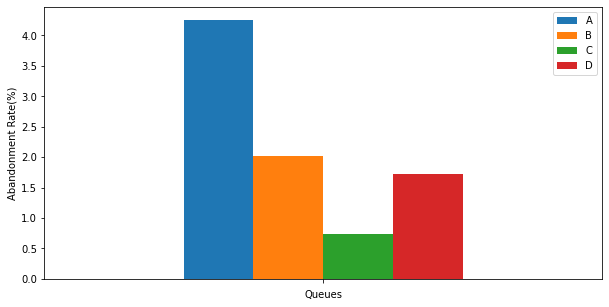

In [31]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i])*100


# Barplot
car_plot = pd.DataFrame(abandonment_rates, index=[''])
car_plot.plot(kind="bar", figsize=(10,5), xlabel='Queues', ylabel='Abandonment Rate(%)')
plt.xticks(rotation=0, ha='center')


In [32]:
abandonment_rates

{'A': 4.25531914893617,
 'B': 2.013422818791946,
 'C': 0.7299270072992701,
 'D': 1.7241379310344827}

In [33]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

# Step (1)
# Lookint at codes below, 'north' dataset is used a lot. Bring the last updated version of North dataset as 'north'. 
north = n_cut_1st_col

north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()


# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

In [34]:
# Step (2)-1

# bring the last column only

service_level_only = service_level.iloc[:, -1]
service_level_only.round(1).to_frame()

,Service Level %
Rep ID,
Amanda,60.0
Andy,30.0
Brent,75.0
Cam,45.5
Duke,42.9
Joe,20.0
Lilly,33.3
Todd,33.3
Xander,33.3


In [35]:
# Step (2)-2

# Average speed of answer per each rep

north_plt

,Rep ID,Incoming Wait Time
0,Amanda,2.400000
1,Andy,3.600000
2,Brent,2.125000
3,Cam,2.909091
4,Duke,2.785714
5,Joe,3.600000
6,Lilly,3.083333
7,Todd,3.500000
8,Xander,3.333333


In [36]:
# Step (2)-3

# Merge service level and the average speed of answer to determine correlation. 

service_level_avg_speed = pd.merge(service_level_only, north_plt, on="Rep ID")
service_level_avg_speed.round()

# Create visualization 2 - What is the service level and average speed of answer per each rep?

,Rep ID,Service Level %,Incoming Wait Time
0,Amanda,60.0,2.0
1,Andy,30.0,4.0
2,Brent,75.0,2.0
3,Cam,45.0,3.0
4,Duke,43.0,3.0
5,Joe,20.0,4.0
6,Lilly,33.0,3.0
7,Todd,33.0,4.0
8,Xander,33.0,3.0


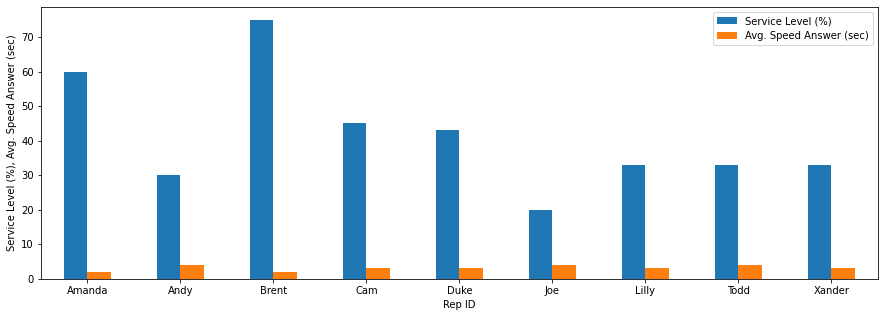

In [37]:
# Step (3) 
data = [
    ["Amanda", 60, 2],
    ["Andy", 30, 4],
    ["Brent", 75, 2],
    ["Cam", 45, 3],
    ["Duke", 43, 3],
    ["Joe", 20, 4],
    ["Lilly", 33, 3],
    ["Todd", 33, 4],
    ["Xander", 33, 3] 
]

q2_chart=pd.DataFrame(data,columns=["Rep ID","Service Level (%)","Avg. Speed Answer (sec)"])

q2_chart.plot(x="Rep ID", y=["Service Level (%)","Avg. Speed Answer (sec)"], 
              kind="bar",
              figsize=(15,5), 
              ylabel='Service Level (%), Avg. Speed Answer (sec)')

plt.xticks(rotation=0, ha='center')
plt.show()

In [38]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

# purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
# complaints = purpose_counts["Complaint"].to_dict()
# sales_support = purpose_counts["Sales Support"].to_dict()
# product_support = purpose_counts["Product Support"].to_dict()

In [39]:
# Step (1)

# I decided to create the information dataset I need on my own rather than assuming how pre-named variables were created.

agg_calls = df.groupby(['Call Purpose', 'Incoming or Outgoing'])['Calls'].sum().unstack().fillna(0)
agg_calls

Incoming or Outgoing,Incoming,Outgoing
Call Purpose,,
Complaint,51.0,0.0
Product Support,82.0,228.0
Sales Support,73.0,120.0


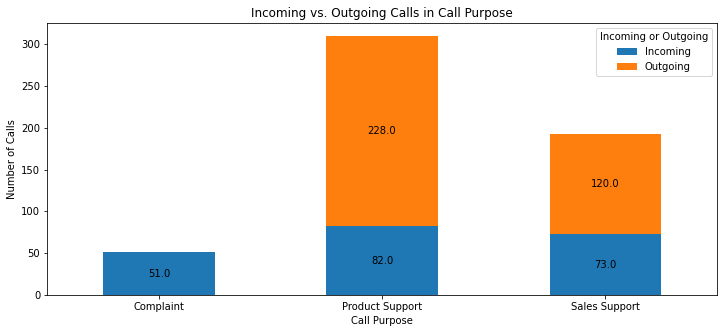

In [40]:
# Step (2)

# For each type of call purpose, how many calls are outgoing vs. incoming?

ax = agg_calls.plot(kind='bar', stacked=True, figsize=(12, 5), xlabel='Call Purpose', ylabel='Number of Calls')
plt.title('Incoming vs. Outgoing Calls in Call Purpose')
plt.xticks(rotation=0, ha='center')

for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')


### Visualization Results

For each chart you created, explain why you chose the chart style you chose. <br><br>

- Create visualization 1 <br>
Bar plot offers various colors for each index so it's easy to look at a glance. <br><br>

- Create visualization 2 <br>
The conclusion I found is that the higher the service level, the shorter the average answer time. The same goes for the other way around. So I wanted to show these two side by side. <br><br>

- Create visualization 3 <br>
I chose the Stacked Bar type to show the total number of calls by call purpose and to show whether it's incoming or outgoing at once in one column.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why? <br><br>
- <b>The South branch operates relatively efficiently.</b><br>

>There is no significant difference between the two branches in Service Level and Average Speed Answer among KPIs so it is difficult to compare. But if I have to choose, the reason I chose South is only based on the Call Abandon Rate. While South had 1 abandoned call out of 125 incoming calls (CAR 0.8%), North had 3 abandoned calls out of 81 incoming calls (CAR 3.7%). See Out[24] for the data table.
>
>On the other hand, having more abandoned calls despite the similar Service Levels and Average Speed Answer at the North branch may indicate that incoming calls itself may have been dropped for other reasons, not long waiting time, such as wrong dial, rather than operational efficiency.
 
<br>
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?<br>

- <b>The North branch. </b><br>

>Although both branches have different numbers of reps (9 reps in North, 11 reps in South), the average prep times* and the average speed of answer time* are very similar. It tells me all reps are working quickly regardless of the total number of reps in each branch. Therefore I would hire more reps in the North branch because they have less number of reps currently. 
>
> *Busy Minutes, Not Ready Minutes, Incoming Wait Time, and During Call Wait Time. See Out[6], Out[7] for the data tables.<br>
> *See Out[30] for the data table.

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?<br>

- <b>Information about call duration and customer satisfaction after the call would be very helpful.</b><br>

>The efficient operation happens when the call center creates higher performance with lower effort. 
>
>What makes higher performance?<br>
>Customer's satisfaction. 
>Because while it reduces re-visit to the call center, it could increase conversion.
>
>What makes less effort?<br>
>The shorter the call time, it requires less effort out of reps. 
>
>The key that applies to both indexes above is how quickly customers get the answers they want. 
>Having data in call duration and customer satisfaction will help to measure the operation efficiency!


## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [41]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
